In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('sample_dataset_1000_rows.csv')
data

,Region,Description,Problem,Street Name,Street Type,Pipe Age,Diameter,Sensor Reading
0,West,No visible issue,Leakage,Birch,Lane,48,41.645574,1.383240
1,West,No visible issue,Contamination,Ash,Lane,30,32.382337,5.232232
2,South,Pipe burst,Blockage,Willow,Lane,32,34.354759,6.167124
3,North,Pipe burst,Pressure drop,Birch,Lane,22,46.239383,8.090598
4,West,Continuous leakage,Blockage,Birch,Drive,39,47.002881,7.400222
5,North,Low pressure,Blockage,Pine,Street,1,28.431065,3.694316
6,West,Water pooling,Blockage,Birch,Place,50,36.047962,7.878718
7,West,Pipe burst,Unknown,Elm,Place,2,11.036598,7.000654
8,East,Continuous leakage,Pressure drop,Cedar,Place,23,24.068660,4.536021
9,North,Pipe burst,Contamination,Ash,Court,38,24.242960,5.440761


In [4]:
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Street Name'] = label_encoder.fit_transform(data['Street Name'])
data['Street Type'] = label_encoder.fit_transform(data['Street Type'])

In [5]:
features = data[['Pipe Age', 'Diameter', 'Sensor Reading', 'Region', 'Street Name', 'Street Type']]

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
kmeans.fit(scaled_features)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
data['Cluster'] = kmeans.labels_

In [9]:
silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.15329646965655985


In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)
outliers = data[data['DBSCAN_Cluster'] == -1]
print(f'Outliers Detected: {len(outliers)}')

Outliers Detected: 49


In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)


In [12]:
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']


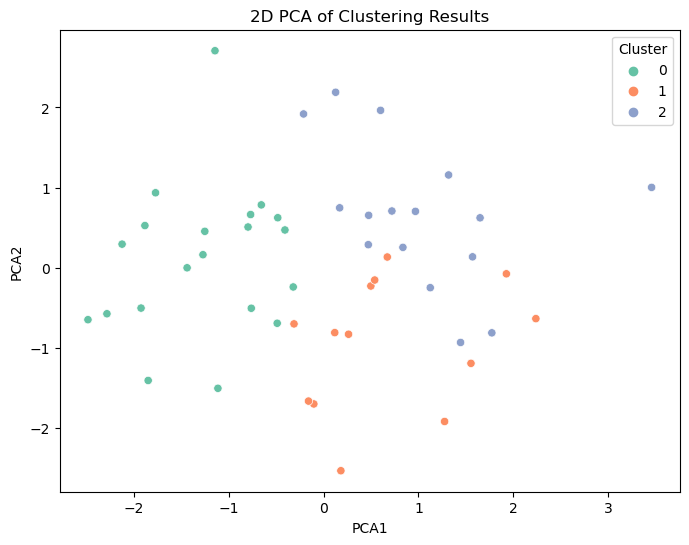

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df)
plt.title('2D PCA of Clustering Results')
plt.show()